In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from DS_Planck_Unet import *

In [10]:
def gen_data_while_training1(big_pixels, batch_size, patches_file, pregen_dir, size=64, no_sample=False, 
                             rotate_aug=False):
    import numpy as np
    import pandas as pd
    import os
    
    patches = pd.read_csv(patches_file)
    patches = patches[np.in1d(patches['pix'], big_pixels)]
    patches.index = np.arange(len(patches))
    
    pic_dict = {}
    mask_dict = {}
    
    for pix in big_pixels:
        pic_dict[pix] = np.load(os.path.join(pregen_dir, str(pix), 'pic.npy'))
        mask_dict[pix] = np.load(os.path.join(pregen_dir, str(pix), 'mask.npy'))
    
    while True:
        sample = patches.sample(frac=1)
        if no_sample:
            sample = patches
        
        for i in range(0, len(patches), batch_size):
            pics = []
            masks = []
            
            cur_pix = np.array(sample['pix'].iloc[i:i+batch_size])
            cur_x = np.array(sample['x'].iloc[i:i+batch_size])
            cur_y = np.array(sample['y'].iloc[i:i+batch_size])
            
            for i in range(batch_size):
                pix = cur_pix[i]
                x = cur_x[i]
                y = cur_y[i]
                
                pics.append(pic_dict[pix][x:x+size,y:y+size,:])
                masks.append(mask_dict[pix][x:x+size,y:y+size,:])
                
                if rotate_aug:
                    n_rot = np.random.randint(4)
                    pics[-1] = np.rot90(pics[-1], n_rot)
                    masks[-1] = np.rot90(masks[-1], n_rot)
                
            
            yield np.stack(pics), np.stack(masks)


In [8]:
gen = gen_data_while_training1([0], 20, '/home/rt2122/Data/Planck/coords/act_erosita_patches.csv', 
                               '/home/rt2122/Data/Planck/pregen_act_erosita/', no_sample=True)

(20, 64, 64, 6) (20, 64, 64, 1)


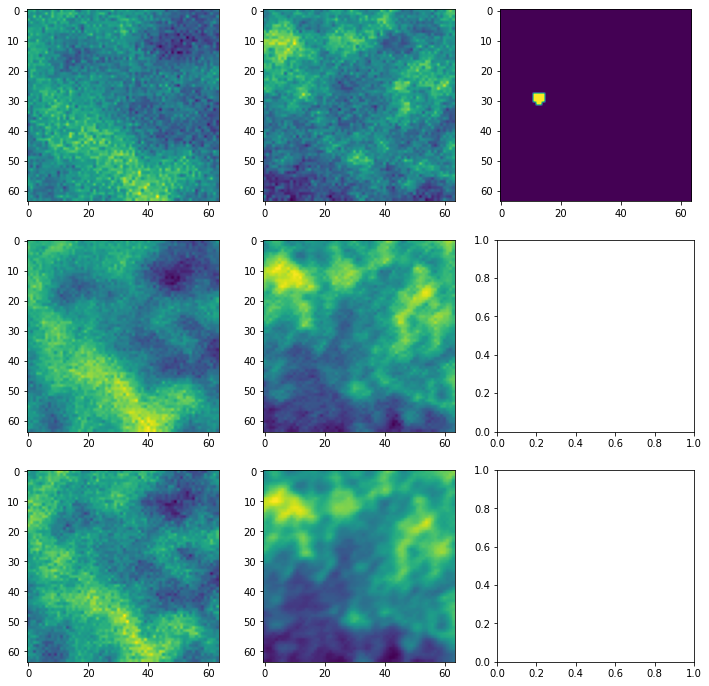

In [9]:
check_gen(gen)

In [7]:
type(gen)

generator

(20, 64, 64, 6) (20, 64, 64, 1)


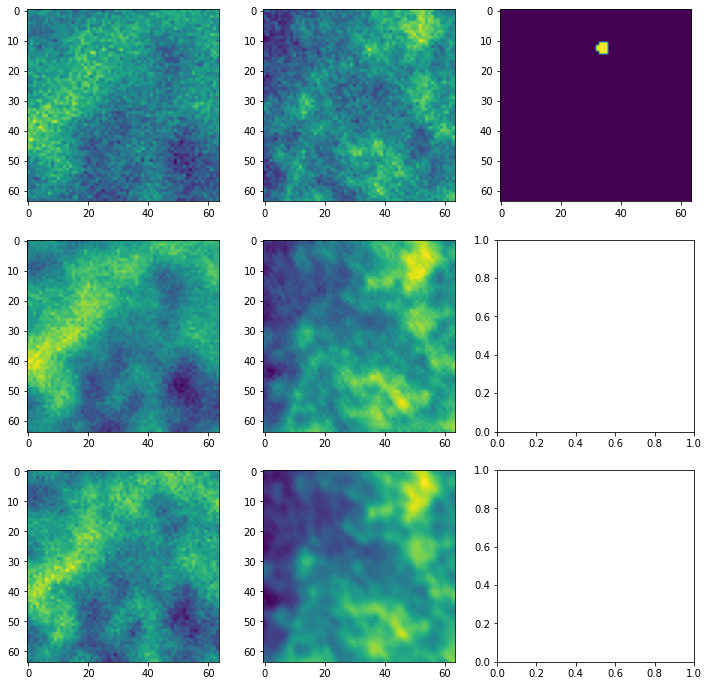

In [11]:
gen1 = gen_data_while_training1([0], 20, '/home/rt2122/Data/Planck/coords/act_erosita_patches.csv', 
                               '/home/rt2122/Data/Planck/pregen_act_erosita/', no_sample=True, rotate_aug=True)
check_gen(gen1)